In [1]:
import numpy as np
import pandas as pd

In [2]:
sales = pd.read_csv('sales_data_sample.csv')

In [3]:
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
sales.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [5]:
df = sales.drop(['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER'],axis=1)

In [6]:
df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

QUANTITYORDERED       AxesSubplot(0.125,0.834518;0.352273x0.0454819)
PRICEEACH          AxesSubplot(0.547727,0.834518;0.352273x0.0454819)
ORDERLINENUMBER        AxesSubplot(0.125,0.77994;0.352273x0.0454819)
SALES               AxesSubplot(0.547727,0.77994;0.352273x0.0454819)
QTR_ID                AxesSubplot(0.125,0.725361;0.352273x0.0454819)
MONTH_ID           AxesSubplot(0.547727,0.725361;0.352273x0.0454819)
YEAR_ID               AxesSubplot(0.125,0.670783;0.352273x0.0454819)
MSRP               AxesSubplot(0.547727,0.670783;0.352273x0.0454819)
dtype: object

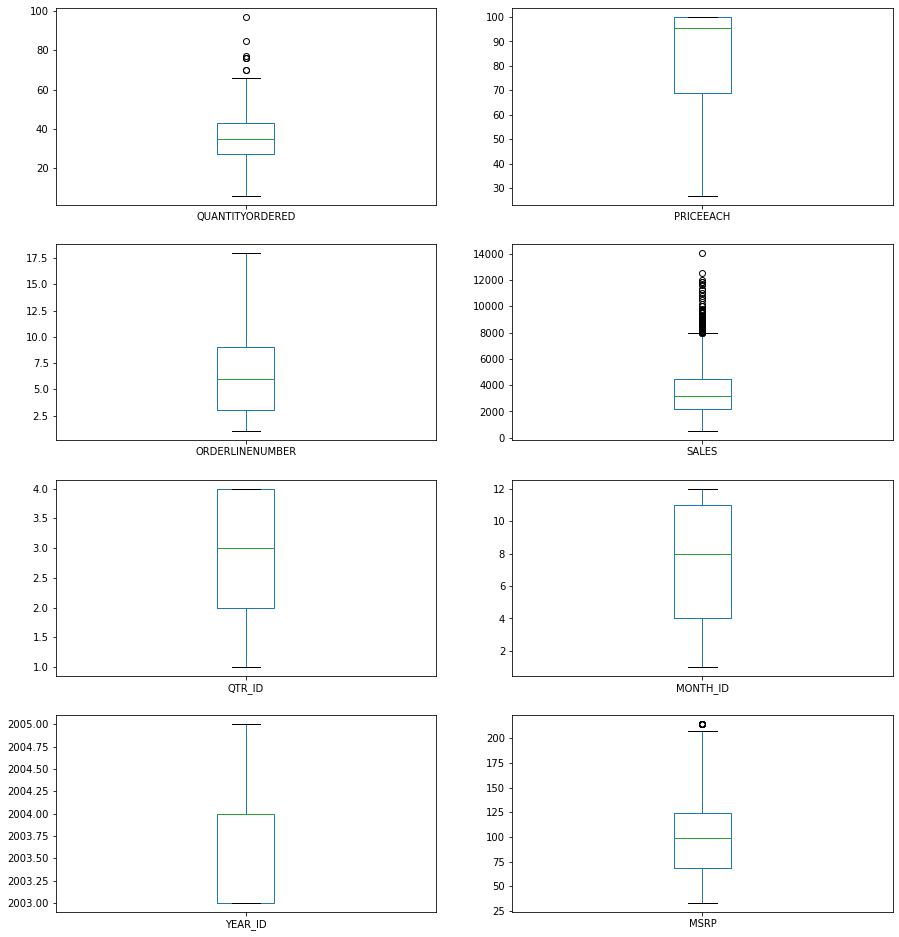

In [7]:
df.plot(kind='box', subplots=True,layout=(14,2), figsize=(15,60))

In [8]:
df.head(3)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium


In [9]:
def dummies(x):
    dummy = pd.get_dummies(df[x])
    df.drop(columns=x, inplace=True)
    return pd.concat([df, dummy], axis = 1)

In [10]:
df = dummies('COUNTRY')

In [11]:
df = dummies('PRODUCTLINE')

In [12]:
df = dummies('DEALSIZE')

In [13]:
df.head(3)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,95,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,95,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,95,...,0,1,0,0,0,0,0,0,1,0


In [14]:
df_group = df.groupby(by='ORDERDATE').sum()

In [15]:
df.drop(['ORDERDATE','QTR_ID'], axis=1,inplace=True)

In [16]:
df.drop('STATUS',axis=1, inplace=True)

In [17]:
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
df_scaled = scaler.fit_transform(df)

In [21]:
from sklearn.cluster import KMeans

In [22]:
scores = []
range_values = (1,15)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    scores.append(kmeans.inertia_)

In [23]:
import matplotlib.pyplot as plt

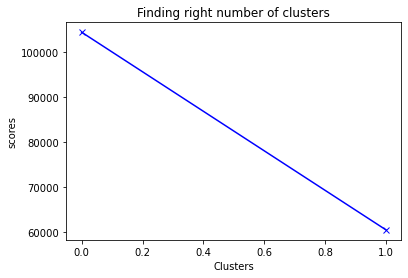

In [24]:
plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show();